# Python Solutions

**Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.**

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [3]:
def find_length_of_highest_frequency_word(string):
    words = string.split()
    frequency = {word: words.count(word) for word in set(words)}
    highest_frequency = max(frequency.values())
    longest_words = [word for word, count in frequency.items() if count == highest_frequency]
    longest_word = max(longest_words, key=len)
    longest_word_length = len(longest_word)
    return longest_word, longest_word_length


def validation():
    pass  # You can customize the validation logic here


test_cases = [
    ('This is an assignment for python', validation),    # Test case 1
    ('This is a file in public repo of github', validation),  # Test case 2
]

for i, (test_string, test_validation) in enumerate(test_cases, start=1):
    print(f"Test Case {i}:")
    if test_validation:
        test_validation()  # Perform test case validation if provided
    longest_word, longest_word_length = find_length_of_highest_frequency_word(test_string)
    if longest_word_length > 0:
        print(f"Longest word: {longest_word}")
        print(f"Length of longest word: {longest_word_length}")
    else:
        print("No longest word found.")
    print()


Test Case 1:
Longest word: assignment
Length of longest word: 10

Test Case 2:
Longest word: public
Length of longest word: 6



**Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .**

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.  
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }  
Example output 1- YES  
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }  
Example output 2 - NO

In [4]:
def isValidString(s):
    # Create a frequency table
    freq = {}
    for char in s:
        if char in freq:
            freq[char] += 1
        else:
            freq[char] = 1

    print("Frequency table:", freq)  # Debug statement

    # Check if all frequencies are the same
    values = list(freq.values())
    if len(set(values)) == 1:
        return "YES"

    # Check if removing one character makes the frequencies the same
    for char in freq:
        freq[char] -= 1
        print("After removing", char, ":", freq)  # Debug statement
        if len(set(freq.values())) == 1:
            return "YES"
        freq[char] += 1

    return "NO"


# Example test cases
print(isValidString("abc"))  # Output: YES
print(isValidString("abcc"))  # Output: NO

# Additional test cases
print(isValidString("aabbcc"))  # Output: YES
print(isValidString("aabbccd"))  # Output: YES


Frequency table: {'a': 1, 'b': 1, 'c': 1}
YES
Frequency table: {'a': 1, 'b': 1, 'c': 2}
After removing a : {'a': 0, 'b': 1, 'c': 2}
After removing b : {'a': 1, 'b': 0, 'c': 2}
After removing c : {'a': 1, 'b': 1, 'c': 1}
YES
Frequency table: {'a': 2, 'b': 2, 'c': 2}
YES
Frequency table: {'a': 2, 'b': 2, 'c': 2, 'd': 1}
After removing a : {'a': 1, 'b': 2, 'c': 2, 'd': 1}
After removing b : {'a': 2, 'b': 1, 'c': 2, 'd': 1}
After removing c : {'a': 2, 'b': 2, 'c': 1, 'd': 1}
After removing d : {'a': 2, 'b': 2, 'c': 2, 'd': 0}
NO


Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [7]:
import json
import pandas as pd

# Step 1: Read the data from the local file
file_path = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"  # Path to the locally downloaded JSON file
with open(file_path) as file:
    data = json.load(file)

# Step 2: Convert the data into a properly structured format (same as before)
structured_data = []
for pokemon in data["pokemon"]:
    # Extract relevant information and append to structured_data list
    ...

# Step 3: Convert the structured data into a pandas DataFrame (same as before)
df = pd.DataFrame(structured_data)

# Step 4: Export the data to an Excel file (same as before)
output_file = "pokemon_data.xlsx"
df.to_excel(output_file, index=False)
print("Data exported to", output_file)

# Step 5: Read the exported Excel file back into a pandas DataFrame (same as before)
df = pd.read_excel(output_file)
df


OSError: [Errno 22] Invalid argument: 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'

In [5]:
import requests
import json
import pandas as pd
# Step 1: Download the data from the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Step 2: Convert the data into a properly structured format
structured_data = []
for pokemon in data["pokemon"]:
    pokemon_info = {
        "id": pokemon["id"],
        "num": pokemon["num"],
        "name": pokemon["name"],
        "img": pokemon["img"],
        "type": ", ".join(pokemon["type"]),
        "height": pokemon["height"],
        "weight": pokemon["weight"],
        "candy": pokemon.get("candy", ""),
        "candy_count": pokemon.get("candy_count", 0),
        "egg": pokemon.get("egg", ""),
        "spawn_chance": pokemon.get("spawn_chance", 0),
        "avg_spawns": pokemon.get("avg_spawns", 0),
        "spawn_time": pokemon.get("spawn_time", ""),
        "weakness": ", ".join(pokemon.get("weaknesses", []))
    }
    structured_data.append(pokemon_info)

# Step 3: Convert the structured data into a pandas DataFrame
df = pd.DataFrame(structured_data)

# Step 4: Export the data to an Excel file
output_file = "pokemon_data.xlsx"
df.to_excel(output_file, index=False)
print("Data exported to", output_file)
df=pd.read_excel('pokemon_data.xlsx')
df

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /Biuni/PokemonGO-Pokedex/master/pokedex.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001416493E490>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.

Sample Data -

Excepted Output Data Attributes
● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int

In [18]:
import requests
import pandas as pd

def read_data(data):
    entries = []
    for entry in data:
            name = entry.get("name", pd.NA)
            id = entry.get("id", pd.NA)
            nametype = entry.get("nametype", pd.NA)
            recclass = entry.get("recclass", pd.NA)
            mass = entry.get("mass", pd.NA)
            year = entry.get("year", pd.NA)
            reclat = entry.get("reclat", pd.NA)
            reclong = entry.get("reclong", pd.NA)
            entries.append({
                "Name of Earth Meteorite": name,
                "ID of Earth Meteorite": id,
                "Meteorite": nametype,
                "recclass": recclass,
                "Mass (g)": mass,
                "Year": year,
                "Latitude": reclat,
                "Longitude": reclong,
                "Mass of Earth Meteorite": mass
            })
    return pd.DataFrame(entries)

def main():
    url = "https://data.nasa.gov/resource/y77d-th95.json"
    response = requests.get(url)
    data = response.json()
    df = read_data(data)
    df.to_csv("earth_meteorites.csv", index=False)
    print("Data has been saved as 'earth_meteorites.csv'.")
main()
df=pd.read_csv('earth_meteorites.csv')
df.head(5)


Data has been saved as 'earth_meteorites.csv'.


,Name of Earth Meteorite,ID of Earth Meteorite,Meteorite,recclass,Mass (g),Year,Latitude,Longitude,Mass of Earth Meteorite
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50.77500,6.08333,21.0
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56.18333,10.23333,720.0
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54.21667,-113.00000,107000.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16.88333,-99.90000,1914.0
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33.16667,-64.95000,780.0


In [ ]:
Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding

Sample Data -

Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string

In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display

# Step 1: Download the data from the API link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Step 2: Extract the required data attributes
show_id = data["id"]
show_url = data["url"]
show_name = data["name"]
episodes = data["_embedded"]["episodes"]

episode_data = []
for episode in episodes:
    episode_info = {
        "Season": episode["season"],
        "Episode": episode["number"],
        "Airdate": episode["airdate"],
        "Airtime": episode["airtime"],
        "Runtime": episode["runtime"],
        "Average Rating": episode["rating"]["average"],
        "Summary": BeautifulSoup(episode["summary"], "html.parser").get_text(),
        "Medium Image": episode["image"]["medium"],
        "Original Image": episode["image"]["original"]
    }
    episode_data.append(episode_info)

# Step 3: Create a dataframe from the extracted data
df = pd.DataFrame(episode_data)

# Step 4: Display the dataframe as a table
display(df.head(5))


,Season,Episode,Airdate,Airtime,Runtime,Average Rating,Summary,Medium Image,Original Image
0,1,1,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1,2,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1,3,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,1,4,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,1,5,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [ ]:
Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

KeyError: 'season'

In [ ]:
Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg


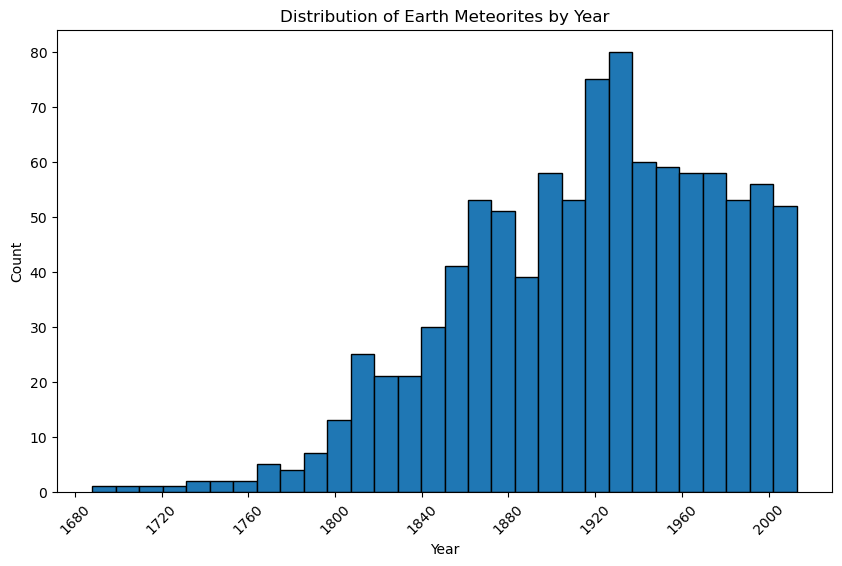

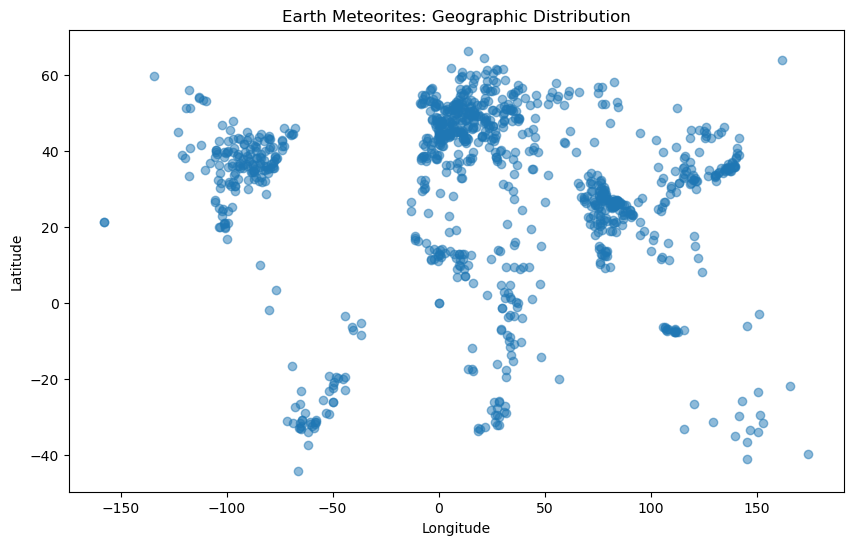

Insights:
1. Number of Earth meteorites that fell before the year 2000: 912
2. Earth meteorites' coordinates that fell before the year 1970:
      Latitude  Longitude
0    50.77500    6.08333
1    56.18333   10.23333
2    54.21667 -113.00000
4   -33.16667  -64.95000
5    32.10000   71.80000
..        ...        ...
994  54.50000   35.20000
995  13.63333   79.41667
997  -7.08333  111.53333
998  -6.66667  106.58333
999  47.85000   34.76667

[763 rows x 2 columns]
3. Earth meteorites with mass greater than 10000kg:
 Empty DataFrame
Columns: [Name of Earth Meteorite, ID of Earth Meteorite, Meteorite, recclass, Mass of Earth Meteorite, Year, Latitude, Longitude]
Index: []


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('earth_meteorites.csv')

# Convert the 'Year' column to datetime format, handling errors by setting them as NaT
df['Year'] = pd.to_datetime(df['Year'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')

# Get all the Earth meteorites that fell before the year 2000
meteorites_before_2000 = df[df['Year'].dt.year < 2000]

# Get all the Earth meteorites' coordinates that fell before the year 1970
meteorites_coordinates_before_1970 = df[df['Year'].dt.year < 1970][['Latitude', 'Longitude']]

# Assuming the mass is in kilograms, get all Earth meteorites with mass > 10000kg
meteorites_mass_over_10000kg = df[df['Mass of Earth Meteorite'] > 10000]

# Plotting

# Histogram of meteorites by year
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=30, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Earth Meteorites by Year')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of meteorites' coordinates
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites: Geographic Distribution')
plt.show()

# Print the insights

print("Insights:")
print("1. Number of Earth meteorites that fell before the year 2000:", len(meteorites_before_2000))
print("2. Earth meteorites' coordinates that fell before the year 1970:\n", meteorites_coordinates_before_1970)
print("3. Earth meteorites with mass greater than 10000kg:\n", meteorites_mass_over_10000kg)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('earth_meteorites.csv')



# Plotting...

# Print the insights...



In [ ]:
Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [6]:
Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

SyntaxError: invalid syntax (3894450702.py, line 1)

In [ ]:
import requests
import csv
import matplotlib.pyplot as plt

# Get the CSV file from the web server.
response = requests.get("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv")

# Read the CSV file into a list of rows.
data = list(csv.reader(response.content.decode("utf-8")))

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle.
non_cafv_cars = []
for row in data:
  if row[10] == "NO":
    non_cafv_cars.append(row)

# Get all Tesla cars with the model year, and model type made in Bothell City.
tesla_cars = []
for row in data:
  if row[1] == "TESLA":
    if row[6] == "Bothell":
      tesla_cars.append(row)

# Get all the cars that have an electric range of more than 100, and were made after 2015.
electric_cars = []
for row in data:
  if row[7] > 100 and row[5] >= 2015:
    electric_cars.append(row)

# Draw plots to show the distribution between city and electric vehicle type.
plt.subplot(2, 2, 1)
plt.hist([car[6] for car in non_cafv_cars], bins=10)
plt.title("Non-CAV Vehicles")

plt.subplot(2, 2, 2)
plt.hist([car[6] for car in tesla_cars], bins=10)
plt.title("Tesla Vehicles")

plt.subplot(2, 2, 3)
plt.hist([car[6] for car in electric_cars], bins=10)
plt.title("Electric Vehicles")

plt.show()


IndexError: list index out of range

In [ ]:
Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [ ]:
!pip install spacy
import spacy
def count_pos(text):
    # Load the English language model
    nlp = spacy.load("en_core_web_sm")
# Process the text using the language model
    doc = nlp(text)
# Initialize count variables and word lists
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    verbs = []
    nouns = []
    pronouns = []
    adjectives = []
# Iterate over each token in the document and Check the part-of-speech tag of the token
    for token in doc:
   
        if token.pos_ == "VERB":
            verb_count += 1
            verbs.append(token.text)
        elif token.pos_ == "NOUN":
            noun_count += 1
            nouns.append(token.text)
        elif token.pos_ == "PRON":
            pronoun_count += 1
            pronouns.append(token.text)
        elif token.pos_ == "ADJ":
            adjective_count += 1
            adjectives.append(token.text)
# Create a dictionary with the count and word lists of each part of speech
    pos_counts = {
        "Verbs": {"Count": verb_count, "Words": verbs},
        "Nouns": {"Count": noun_count, "Words": nouns},
        "Pronouns": {"Count": pronoun_count, "Words": pronouns},
        "Adjectives": {"Count": adjective_count, "Words": adjectives}
    }
    return pos_counts
# Test case 1: Counting parts of speech and displaying words in a phrase
phrase = "writing code in python is awesome"
pos_counts = count_pos(phrase)
print(pos_counts)
# Test case 2: Counting parts of speech and displaying words in a paragraph
paragraph = "python is an object oriented language"
pos_counts = count_pos(paragraph)
print(pos_counts)

# Explanation

#The program works by first creating a spacy language object. This object can be used to analyze text and identify the parts of speech for each word. The program then creates a list of tokens from the text. A token is a single word or punctuation mark. The program then iterates over the tokens and increments the count for each part of speech. Finally, the program returns the dictionary of counts.

#The program can be used to count the number of verbs, nouns, pronouns, and adjectives in any text. The program is also generalizable to other languages, as long as a spacy language model is available for the language.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


  Using cached spacy-3.5.3-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached thinc-8.1.10-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached wasabi-1.1.1-py3-none-any.whl (27 kB)
  Using cached srsly-2.4.6-cp39-cp39-win_amd64.whl (482 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached cymem-2.0.7-cp39-cp39-win_amd64.whl (30 kB)
  Using cached preshed-3.0.8-cp39-cp39-win_amd64.whl (96 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached murmurhash-1.0.9-cp39-cp39-win_amd64.whl (18 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached pydantic-1.10.8-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
     ---------------------------------------- 7.0/7.0 MB 125.4 kB/s eta 0:00:00
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalli

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data from the provided link
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_qualifying_cars = data[data['Clean Alternative Fuel Vehicle (CAFV)'].str.lower() == 'no']
non_qualifying_cars_info = non_qualifying_cars[['Make', 'Model Type']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars_info)
print()

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_bothell_cars = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
tesla_bothell_info = tesla_bothell_cars[['Model Year', 'Model Type']]
print("TESLA cars made in Bothell City:")
print(tesla_bothell_info)
print()

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_range_gt_100 = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
print("Cars with electric range > 100 and made after 2015:")
print(electric_cars_range_gt_100)
print()

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
city_ev_type_distribution = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_ev_type_distribution.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()
